In [1]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.optimize import minimize
ind = erk.get_ind_returns()         #Read and automatically format the data

#Required user-defined settings
BeginningPeriod = "1996"            #Starting period for historical analysis
EndingPeriod = "2000"               #Ending period for historical analysis
rf=0.048                            #Set the annualized risk-free rate
min_allocation = 0.0                #The optimizer's rule for minimium weight per asset
max_allocation = 1.0                #The optimizer's rule for maximum weight per asset
solver="SLSQP"                      #The optimizer's solver function from scipy.optimize

## 2 Asset Frontier:

In [2]:
#Define the two assets from dataset that you'd like to model
l = ["Games", "Fin"]

In [3]:
#Set up the returns vector
er = erk.annualize_ret(ind[BeginningPeriod:EndingPeriod], 12)
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

In [4]:
#Set up the covariance matrix
cov = ind[BeginningPeriod:EndingPeriod].cov()
cov.loc[l,l]

,Games,Fin
Games,0.003773,0.002416
Fin,0.002416,0.003982


In [5]:
#Use list comprehension to set up a weights vector for the 2 asset case
n_points = 20 #the number of points that you want to define the efficient frontier
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)] #list comprehension
len(weights) #each element corresponds to the asset weights at each point along the efficient frontier

20

In [6]:
#Use list comprehension to set up a portfolio returns vector different combinations of asset A and asset B (which together consitutes a portoflio)
rets = [erk.portfolio_return(w, er[l]) for w in weights]
len(rets) #each element corresponds to the weighted average (portfolio) return at each point along the efficient frontier (y-axis)

20

In [7]:
#Use list comprehension to set up a portfolio returns vector different combinations of asset A and asset B (which together consitutes a portoflio)
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
len(vols) #each element corresponds to the volatility of asset returns at each point along the efficient frontier (x-axis)

20

In [8]:
#Create a DataFrame for the efficient frontier
ef = pd.DataFrame({"R": rets, "Vol": vols})
ef

,R,Vol
0,0.223371,0.063100
1,0.215205,0.061845
2,0.207039,0.060699
3,0.198873,0.059666
4,0.190706,0.058753
5,0.182540,0.057965
6,0.174374,0.057308
7,0.166207,0.056786
8,0.158041,0.056403
9,0.149875,0.056161


<Axes: xlabel='Vol', ylabel='R'>

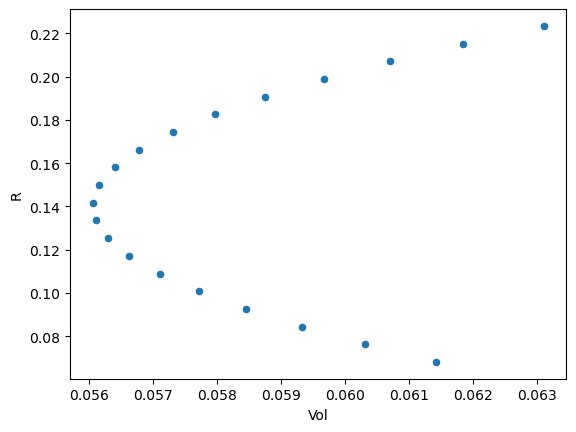

In [9]:
#Plot the efficient frontier
ef.plot.scatter(x="Vol", y="R")

<Axes: xlabel='Volatility'>

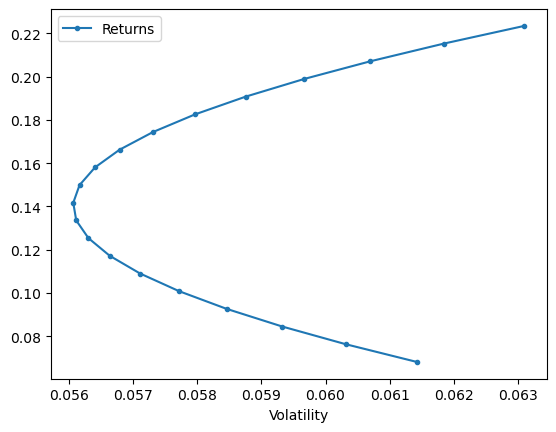

In [10]:
#Interpolate the efficient frontier
erk.plot_ef2(n_points, er[l], cov.loc[l,l])

## K-Asset Markowitz Portfolio:

<Axes: xlabel='Volatility'>

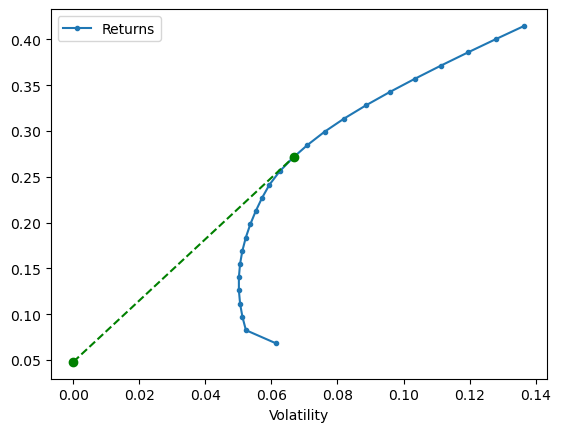

In [11]:
#Define assets and plot the efficient frontier
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l], riskfree_rate=rf, show_ew=False)

In [12]:
#k-asset tangent portfolio weights
w_msr = erk.msr(rf, er[l], cov.loc[l,l])
w_msr_rounded = np.round(w_msr,2)
er_rounded = np.round(er[l],2)
MarkowitzPortfolio_k = pd.DataFrame({'Absolute Return': er_rounded, 'Optimal Weight': w_msr_rounded})
MarkowitzPortfolio_k

,Absolute Return,Optimal Weight
Smoke,0.11,0.07
Fin,0.22,0.64
Games,0.07,0.00
Coal,0.41,0.29


In [13]:
#Annualized k-asset tangent portfolio return
erk.portfolio_return(w_msr, er[l])

0.2717405679749211

In [14]:
#Annualized k-asset tangent portfolio volatility
erk.portfolio_vol(w_msr, cov.loc[l,l])

0.06677996644184894

## Finding the Maximum Sharpe Ratio Portfolio (MSR) aka Tangent Portfolio:

<Axes: xlabel='Volatility'>

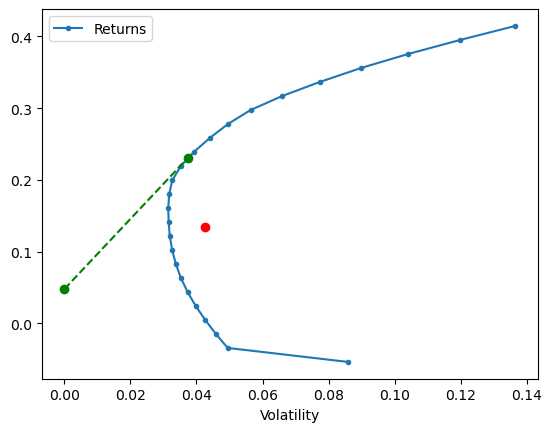

In [15]:
#Plot the efficient frontier for all assets in our dataset (30 in total) with 25 points
erk.plot_ef(25, er, cov, riskfree_rate=rf, min=min_allocation, max=max_allocation, optimizer=solver)

In [16]:
#tangent portfolio: rounded asset weights for all 30 assets
w_msr = erk.msr(rf, er, cov, min=min_allocation, max=max_allocation, optimizer=solver)
w_msr_rounded = np.round(w_msr,2)
er_rounded = np.round(er,2)
MarkowitzPortfolio = pd.DataFrame({'Absolute Return': er_rounded, 'Optimal Weight': w_msr_rounded})
MarkowitzPortfolio


,Absolute Return,Optimal Weight
Food,0.12,0.00
Beer,0.14,0.00
Smoke,0.11,0.00
Games,0.07,0.00
Books,0.19,0.00
Hshld,0.13,0.00
Clths,0.08,0.00
Hlth,0.25,0.34
Chems,0.08,0.00
Txtls,-0.04,0.00


In [17]:
#Report annualized tangent portfolio return and volatility
print("%Ret:", round(erk.portfolio_return(w_msr, er)*100,2))
print("%Vol:", round(erk.portfolio_vol(w_msr, cov)*100,2))

%Ret: 23.05
%Vol: 3.73
